<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/AA_3_03_Lab1_Submit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1 & Submit

## Linear Regression and Boston Data Set

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- **Load Boston Data Set**

In [75]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv(url, delim_whitespace=True, names=names)

- **Assign data to X and target to y**

In [76]:
X=boston.drop('MEDV',axis=1).values
y=boston['MEDV'].values

- **Check the shape of the dataset**

In [77]:
boston.shape, X.shape, y.shape

((506, 14), (506, 13), (506,))

- **Plot the scatter plot of each attribute versus MEDV**

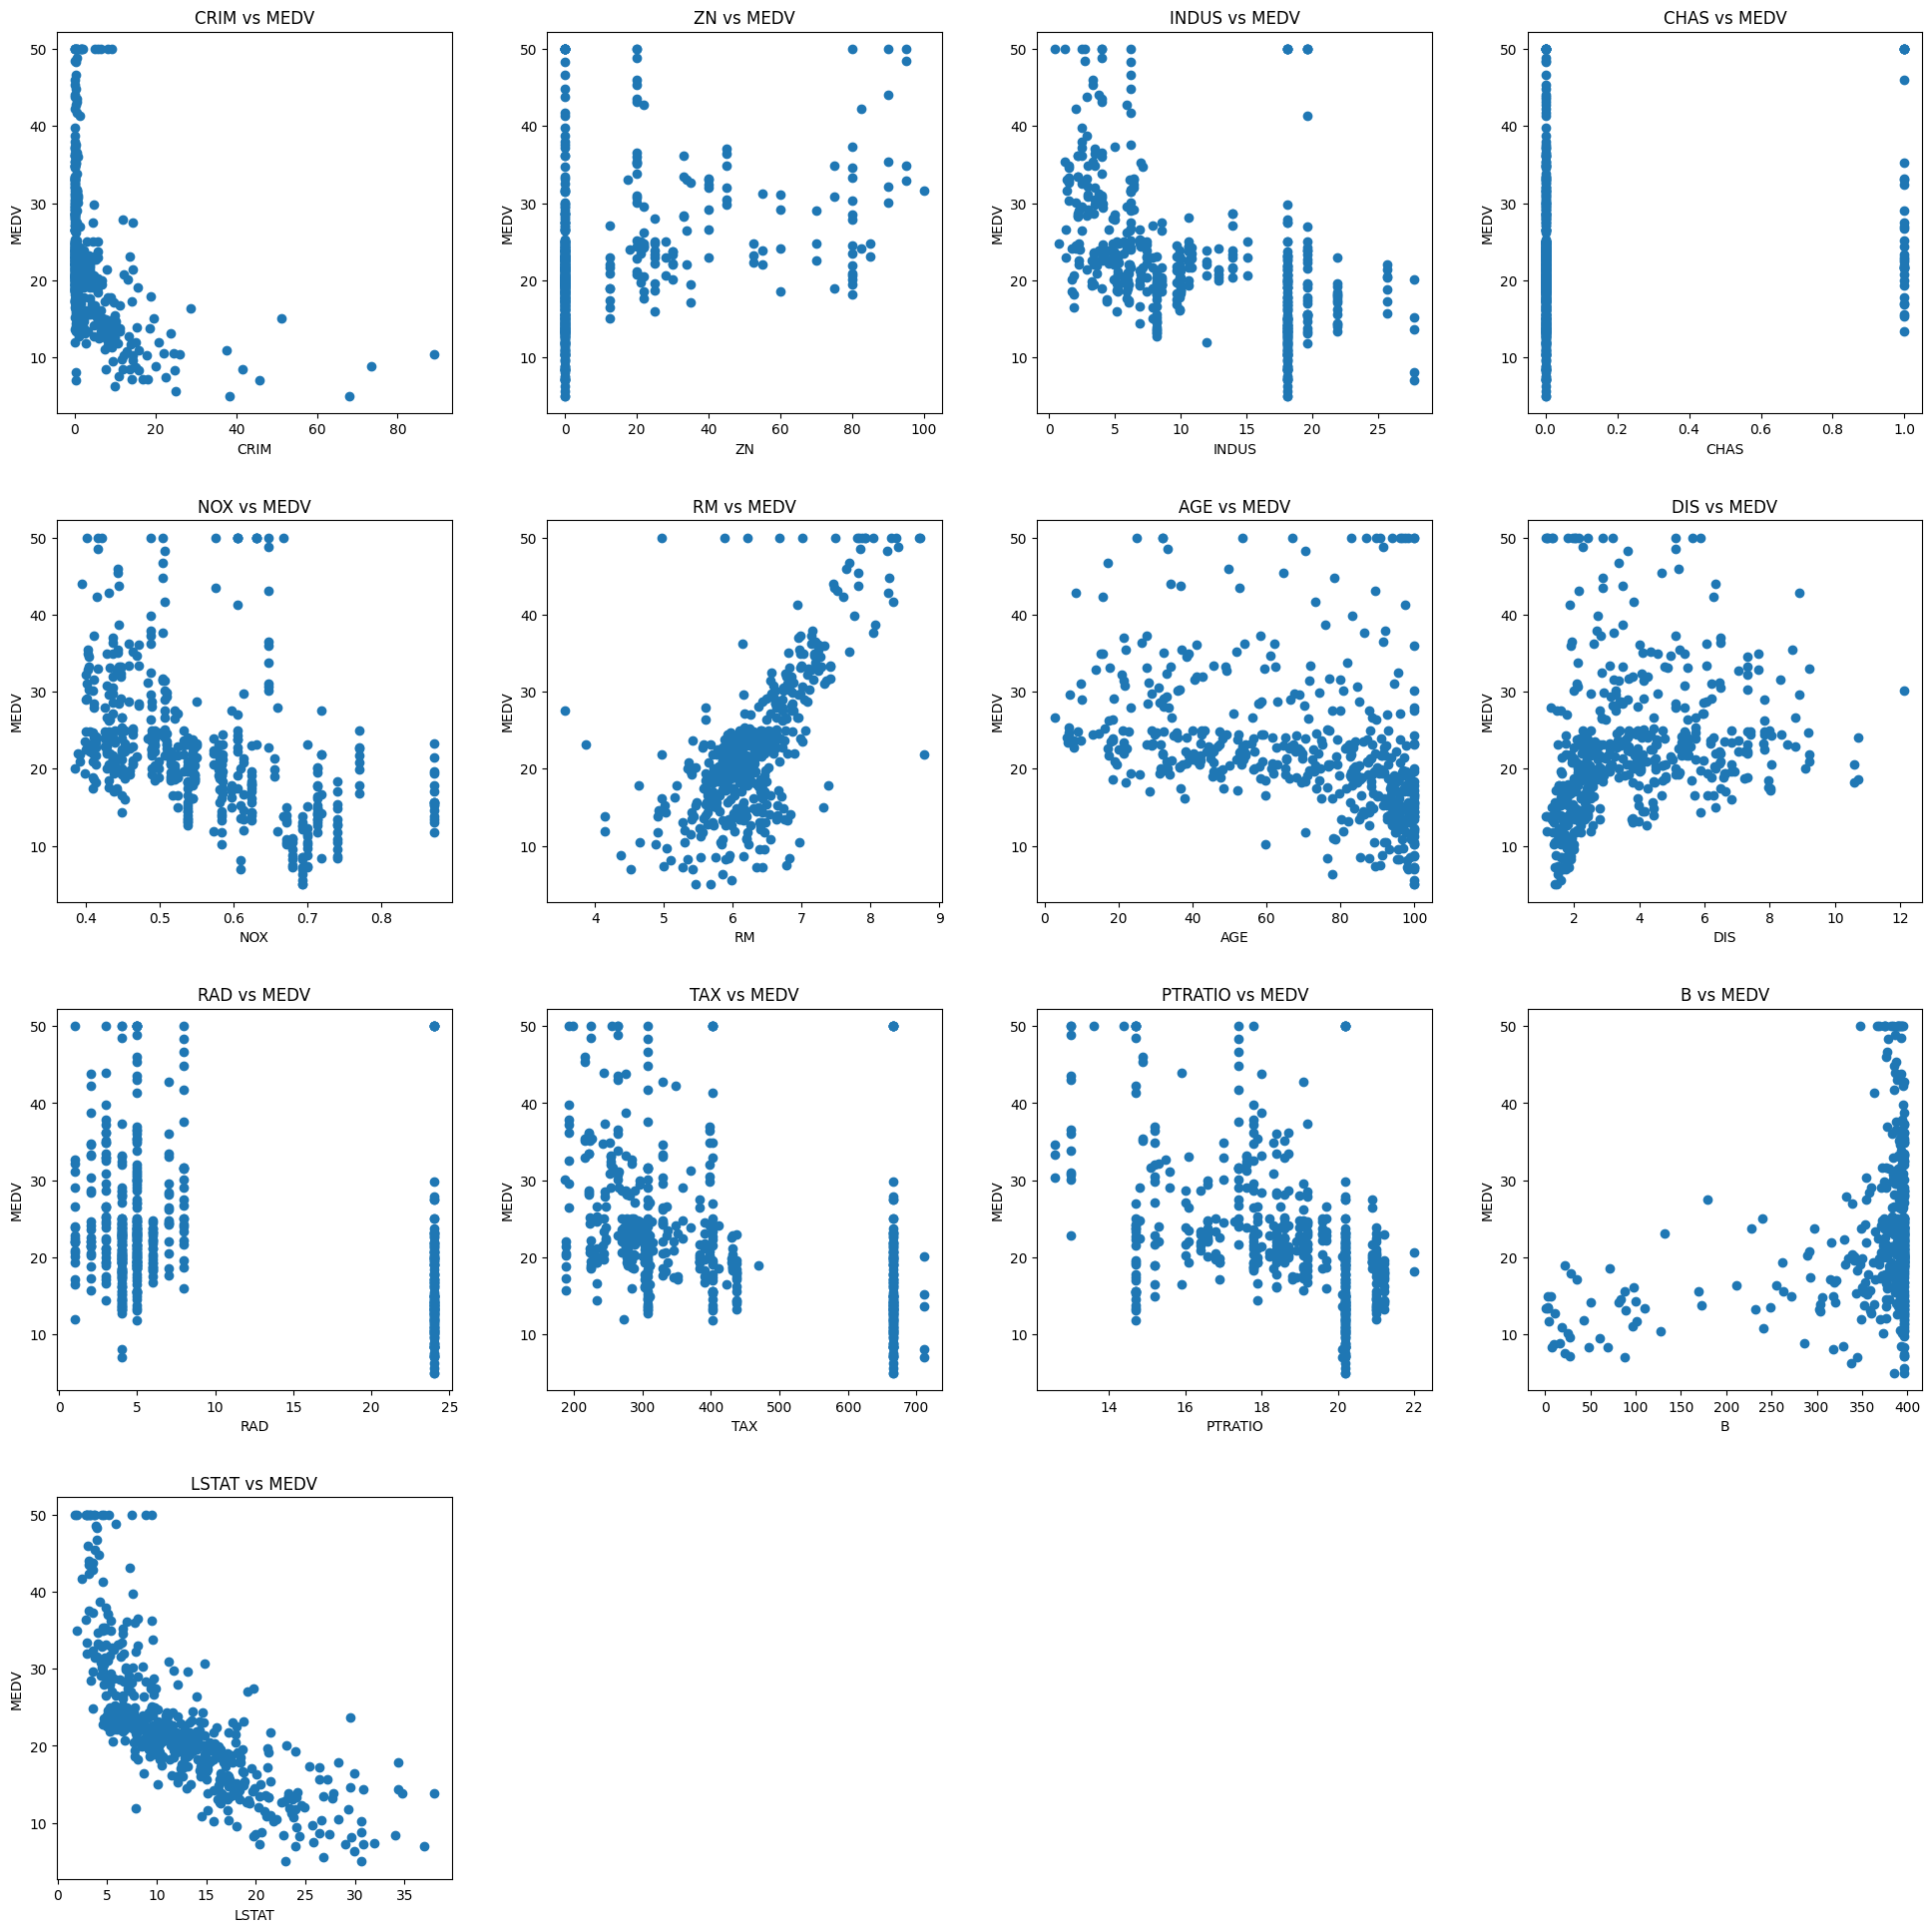

In [78]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    column = df.columns[i]
    ax.scatter(df[column], df['MEDV'])
    ax.set_title(f'{column} vs MEDV')
    ax.set_xlabel(column)
    ax.set_ylabel('MEDV')

plt.tight_layout(pad=3)
plt.show()

- **Split the dataset into test and train datasets, you can set the random seed to 42 by random_state=42**

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- **run cross validation for the train and test datasets for cv=10**

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

train_scores = cross_val_score(lr, X_train, y_train, cv=10)

test_scores = cross_val_score(lr, X_test, y_test, cv=10)

print(f"Training set CV scores: {train_scores}")
print(f"Training set CV mean score: {np.mean(train_scores)}")
print(f"Test set CV scores: {test_scores}")
print(f"Test set CV mean score: {np.mean(test_scores)}")


Training set CV scores: [0.78005109 0.79231329 0.75452641 0.29904458 0.78702938 0.72324517
 0.84606865 0.66835141 0.79974401 0.5362705 ]
Training set CV mean score: 0.6986644490108916
Test set CV scores: [ 0.49530423  0.80239097  0.49809325  0.14267101  0.8560368   0.67783362
  0.70716076  0.91237586  0.64034695 -0.53792062]
Test set CV mean score: 0.5194292838853564


- **print the mean score for the cross validation using linear regressor (LinearRegressor())**

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

train_scores = cross_val_score(lr, X_train, y_train, cv=10)

test_scores = cross_val_score(lr, X_test, y_test, cv=10)

print(f"Training set CV mean score: {np.mean(train_scores)}")
print(f"Test set CV mean score: {np.mean(test_scores)}")


Training set CV mean score: 0.6986644490108916
Test set CV mean score: 0.5194292838853564



- **do the same two steps above for random forest regressor. For that you can import from sklearn.ensemble import RandomForestRegressor**

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

train_scores = cross_val_score(rf, X_train, y_train, cv=10)

test_scores = cross_val_score(rf, X_test, y_test, cv=10)

print(f"Training set CV mean score: {np.mean(train_scores)}")
print(f"Test set CV mean score: {np.mean(test_scores)}")


Training set CV mean score: 0.8254511118018015
Test set CV mean score: 0.7465810643790919


## Boston Housing Data with Polynomials

- **Transform the Boston House dataset and split the dataset into test and train datasets**


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)

X_test_poly = poly.transform(X_test)


- **Run cross-validation**

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_poly, y_train)

models = [("Polynomial Regression", poly_model), ("Random Forest Regressor", rf_model)]
for name, model in models:
    cv_scores_train = cross_val_score(model, X_train_poly, y_train, cv=10, scoring="neg_mean_squared_error")
    rmse_scores_train = np.sqrt(-cv_scores_train)
    print('-'*80)
    print(f"{name} Train Cross-validation RMSE scores:", rmse_scores_train)
    print('-'*80)
    print(f"{name} Train Average RMSE score:", rmse_scores_train.mean())
    print('-'*80)
    cv_scores_test = cross_val_score(model, X_test_poly, y_test, cv=10, scoring="neg_mean_squared_error")
    rmse_scores_test = np.sqrt(-cv_scores_test)
    print(f"{name} Test Cross-validation RMSE scores:", rmse_scores_test)
    print('-'*80)
    print(f"{name} Test Average RMSE score:", rmse_scores_test.mean())


--------------------------------------------------------------------------------
Polynomial Regression Train Cross-validation RMSE scores: [5.28592082 5.15339713 7.30193191 5.77274316 4.59969266 5.81554643
 6.53743858 4.53911672 6.31052746 9.30838508]
--------------------------------------------------------------------------------
Polynomial Regression Train Average RMSE score: 6.062469995405689
--------------------------------------------------------------------------------
Polynomial Regression Test Cross-validation RMSE scores: [ 7.85863871  4.76823732  9.24077866 11.19257293  7.60833985 20.78283964
  9.92628709 11.10274263 42.26976484 20.96703611]
--------------------------------------------------------------------------------
Polynomial Regression Test Average RMSE score: 14.57172377931503
--------------------------------------------------------------------------------
Random Forest Regressor Train Cross-validation RMSE scores: [3.08435698 2.79801272 4.74354836 2.98271702 2.730177

- **Plot the coefficients of the model**

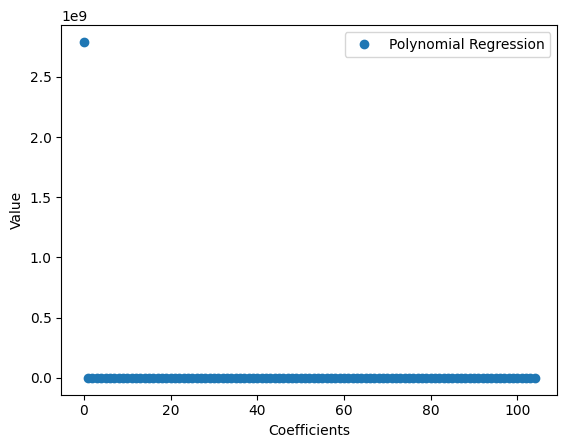

In [85]:
import matplotlib.pyplot as plt

plt.plot(poly_model.coef_, 'o', label="Polynomial Regression")
plt.xlabel("Coefficients")
plt.ylabel("Value")
plt.legend()
plt.show()